# Making networks with Twitter data

This notebook will walk you through how to create and analyze networks using Twitter data.

## Data preprocessing: getting data into NetworkX

To make a network in NetworkX using external data, the nodes and the connections between them must be represented by pairs of tuples. In this first section, we'll walk through some data preprocessing techniques together to get our data ready for analysis.

Let's take a look at the data we're working with.

In [1]:
import json

f = open('../../data/friends/list.PyTennessee.json')
pairs = []

data = json.load(f)
for item in data['users']:
    pairs.append(('PyTennessee', str(item['screen_name']))) 
    
print pairs[:10]

[('PyTennessee', 'LampPostGroup'), ('PyTennessee', 'octovisinc'), ('PyTennessee', 'nashdevcal'), ('PyTennessee', 'hsvpy'), ('PyTennessee', 'bvalentine615'), ('PyTennessee', 'awebneck'), ('PyTennessee', 'ascot21'), ('PyTennessee', 'pyohio'), ('PyTennessee', 'CalEvans'), ('PyTennessee', 'nodevember')]


In [2]:
# Because the relationship data is split across files, we need to
# walk through all of them to get the data.
import os

for (dir_path, dir_names, file_names) in os.walk('../../data/friend_relationships/'):
    f = file_names

In [3]:
for file_name in f:
    with open('../../data/friend_relationships/' + file_name) as p:
        pair_data = json.load(p)
        for k in pair_data.keys():
            twitter_pair = k.split()
            if pair_data[k]['relationship']['source']['following'] is True:
                pairs.append((str(twitter_pair[0]), str(twitter_pair[1])))
            elif pair_data[k]['relationship']['source']['followed_by'] is True:
                pairs.append((str(twitter_pair[1]), str(twitter_pair[0])))
    
print len(pairs)

1286


In [4]:
# Hint: if you want to sort a dictionary to easily 
# find the highest and lowest values, use this function 
# on the output of the centrality measures like degree_centrality():

import operator

def centrality_sort(centrality_dict):
    return sorted(centrality_dict.iteritems(), key=operator.itemgetter(1))

# ex. degree_sorted = centrality_sort(degree_vals)

## Make networks with Twitter data

-------------Degree Centrality-------------
Highest degree: [('jacqueswoodcock', 0.4051724137931034), ('pyohio', 0.41379310344827586), ('jasonamyers', 0.603448275862069), ('egdelwonk', 0.7672413793103449), ('PyTennessee', 1.0)]


Lowest degree: [('thefeatures', 0.008620689655172414), ('whitacre', 0.008620689655172414), ('NashGeekJam', 0.017241379310344827), ('Spotify', 0.017241379310344827), ('MosaikGlobal', 0.017241379310344827)]


-------------Betweenness Centrality-------------
Highest betweenness: [('pyohio', 0.016718743040420384), ('timoguin', 0.017094265351580578), ('jasonamyers', 0.04648643703702743), ('egdelwonk', 0.11449112331343883), ('PyTennessee', 0.32050329473086847)]


Lowest betweenness: [('SurveyMonkey', 0.0), ('NashGeekJam', 0.0), ('thefeatures', 0.0), ('studionow', 0.0), ('Spotify', 0.0)]


-------------Closeness Centrality-------------
Highest closeness: [('jacqueswoodcock', 0.6270270270270271), ('pyohio', 0.6304347826086957), ('jasonamyers', 0.7160493827160493), ('e

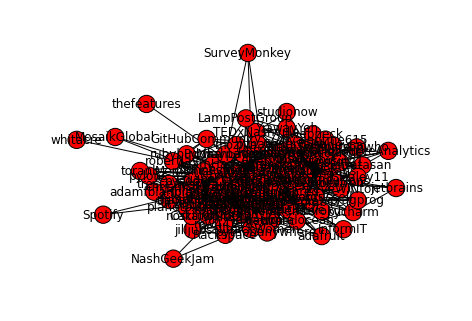

In [5]:
%matplotlib inline
import networkx as nx
import operator

# Build an undirected graph. What's going on?
g = nx.Graph()
g.add_edges_from(pairs)
nx.draw(g)

# How connected is the network?
# Very connected!

# Centrality: which nodes have the highest/lowest degree centrality?
degree_centrality = nx.degree_centrality(g)
degree_sorted = centrality_sort(degree_centrality)
print '-------------Degree Centrality-------------'
print 'Highest degree:', degree_sorted[-5:]
print '\n'
print 'Lowest degree:', degree_sorted[:5]
print '\n'

# Centrality: which nodes have the highest/lowest betweenness centrality?
betweenness = nx.betweenness_centrality(g)
betweenness_sorted = centrality_sort(betweenness)
print '-------------Betweenness Centrality-------------'
print 'Highest betweenness:', betweenness_sorted[-5:]
print '\n'
print 'Lowest betweenness:', betweenness_sorted[:5]
print '\n'

# Centrality: which nodes have the highest/lowest closeness centrality?
closeness = nx.closeness_centrality(g)
closeness_sorted = centrality_sort(closeness)
print '-------------Closeness Centrality-------------'
print 'Highest closeness:', closeness_sorted[-5:]
print '\n'
print 'Lowest closeness:', closeness_sorted[:5]

# At the end, discuss these questions more in-depth.

In [6]:
highest_degree = [node[0] for node in degree_sorted[-20:]]

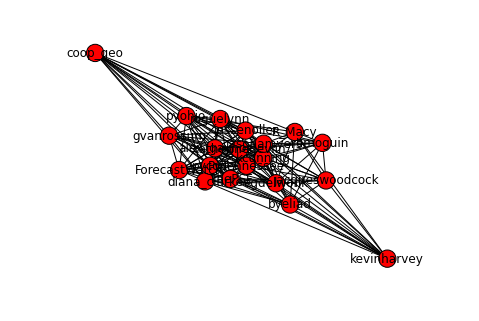

In [7]:
sub = g.subgraph(highest_degree)
nx.draw(sub)

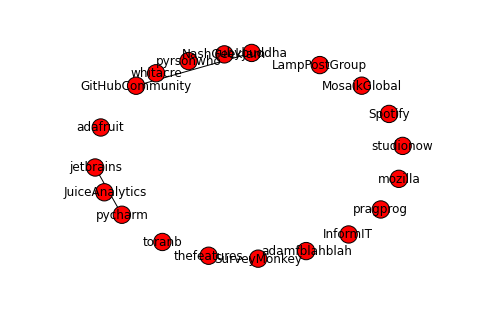

In [8]:
lowest_degree = [node[0] for node in degree_sorted[:20]]
subl = g.subgraph(lowest_degree)
nx.draw(subl)

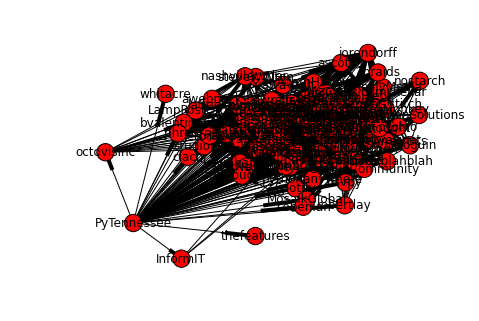

In [9]:
# Directed graph

d = nx.DiGraph()

d.add_edges_from(pairs)
nx.draw(d)

In [10]:
in_degree_centrality = nx.in_degree_centrality(d)
in_degree_sorted = sorted(in_degree_centrality.iteritems(), key=operator.itemgetter(1))
print '-------------Degree Centrality-------------'
print 'Highest in degree:', in_degree_sorted[-5:]
print '\n'
print 'Lowest in degree:', in_degree_sorted[:5]
print '\n'

out_degree_centrality = nx.out_degree_centrality(d)
out_degree_sorted = sorted(out_degree_centrality.iteritems(), key=operator.itemgetter(1))
print '-------------Degree Centrality-------------'
print 'Highest out degree:', out_degree_sorted[-5:]
print '\n'
print 'Lowest out degree:', out_degree_sorted[:5]

-------------Degree Centrality-------------
Highest in degree: [('ThePSF', 0.3103448275862069), ('egdelwonk', 0.3189655172413793), ('pycon', 0.33620689655172414), ('gvanrossum', 0.33620689655172414), ('jasonamyers', 0.46551724137931033)]


Lowest in degree: [('PyTennessee', 0.0), ('thefeatures', 0.008620689655172414), ('whitacre', 0.008620689655172414), ('octovisinc', 0.008620689655172414), ('robertlay', 0.008620689655172414)]


-------------Degree Centrality-------------
Highest out degree: [('kevinharvey', 0.27586206896551724), ('timoguin', 0.3620689655172414), ('pyohio', 0.3793103448275862), ('egdelwonk', 0.4482758620689655), ('PyTennessee', 1.0)]


Lowest out degree: [('whit537', 0.0), ('hacknashville', 0.0), ('eldarion', 0.0), ('CoderFaire', 0.0), ('pycoders', 0.0)]


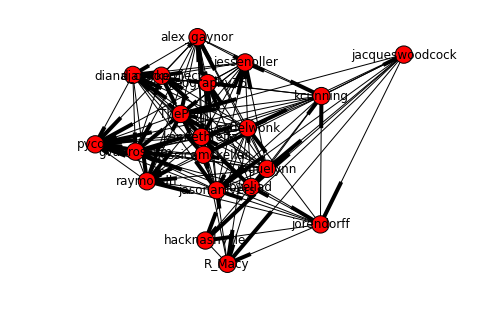

In [11]:
highest_in_degree = [node[0] for node in in_degree_sorted[-20:]]
subin = d.subgraph(highest_in_degree)
nx.draw(subin)

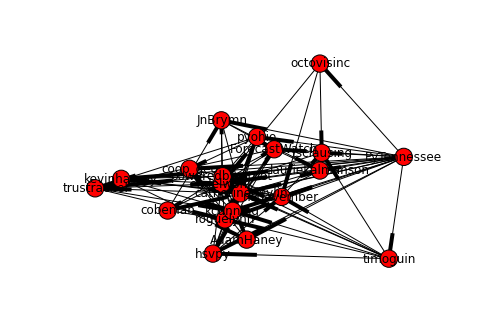

In [12]:
highest_out_degree = [node[0] for node in out_degree_sorted[-20:]]
subin = d.subgraph(highest_out_degree)
nx.draw(subin)